<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Youtube_KR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pywaffle as Waffle
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from matplotlib.gridspec import GridSpec 

In [ ]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

In [239]:
import matplotlib as mpl
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [ ]:
pip install plotly.express

In [ ]:
pip install pywaffle

     |████████████████████████████████| 532kB 7.0MB/s 


In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 329kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [240]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Youtube-KRvideos.csv',engine='python',)

In [241]:
data = data.drop(['publish_time', 'thumbnail_link'], axis=1)
## 불필요한 컬럼 지우기

In [242]:
data['trending_date'] = '20' + data['trending_date']

In [243]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%Y.%d.%m')

In [244]:
data['Year'] = data['trending_date'].dt.year
data['Month'] = data['trending_date'].dt.month
data['day'] = data['trending_date'].dt.day

In [245]:
data_channel_likes = data.groupby('channel_title')['likes'].sum().sort_values(ascending=False)
## 채널별 좋아요 총 합

In [246]:
data_channel_likes = data_channel_likes[data_channel_likes.values != 0]
## 좋아요 0은 뺌

In [247]:
data_channel_likes_top20 = data_channel_likes.iloc[:20]

In [248]:
fig = px.bar(data_frame=data_channel_likes_top20, x=data_channel_likes_top20.index, y=data_channel_likes_top20, color=data_channel_likes_top20.index, color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title='채널별 좋아요 합계',
                  title_font_size=25,
                  title_font_family='sans_serif',
)

In [249]:
data_ld = data.groupby('channel_title')['likes', 'dislikes'].sum().sort_values(by='likes', ascending=False)

In [250]:
data_ld['likes_percent'] = data_ld['likes']/(data_ld['likes']+data_ld['dislikes'])
data_ld['dislikes_percent'] = data_ld['dislikes']/(data_ld['likes']+data_ld['dislikes'])
## 비율화
data_ld_top30 = data_ld[:30]

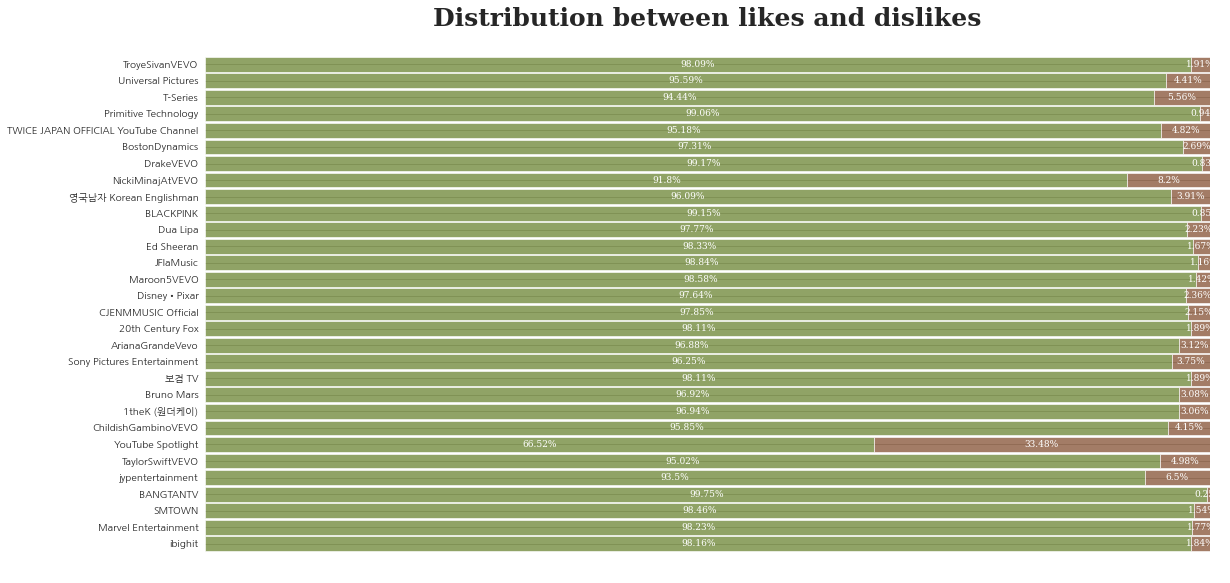

In [251]:
fig, ax = plt.subplots(figsize=(18,10))
ax.barh(data_ld_top30.index, data_ld_top30['likes_percent'], color='#476600', alpha=.6, height=.9)
ax.barh(data_ld_top30.index, data_ld_top30['dislikes_percent'], left=data_ld_top30['likes_percent'], color='#662500', alpha=.6, height=.9)
ax.set_xlim([0,1])
ax.set_xticks([])
ax.set_title('Distribution between likes and dislikes', fontsize=25, fontweight='bold', fontfamily='serif')

for i in data_ld_top30.index:
  ax.annotate(f"{round(data_ld_top30['likes_percent'].loc[i]*100, 2)}%", xy=(data_ld_top30['likes_percent'].loc[i]/2, i), va='center', ha='center', color='w', fontfamily='serif', fontweight='light', fontsize=9)

for i in data_ld_top30.index:
  ax.annotate(f"{round(data_ld_top30['dislikes_percent'].loc[i]*100, 2)}%", xy=(data_ld_top30['likes_percent'].loc[i] + data_ld_top30['dislikes_percent'].loc[i]/2, i), va='center', ha='center', color='w', fontfamily='serif', fontweight='light', fontsize=9)

for i in ['top', 'bottom', 'left', 'right']:
  ax.spines[i].set_visible(False)

In [ ]:
data_ld_top20.T.drop(['likes', 'dislikes'])

channel_title,ibighit,Marvel Entertainment,SMTOWN,BANGTANTV,jypentertainment,TaylorSwiftVEVO,YouTube Spotlight,ChildishGambinoVEVO,1theK (원더케이),Bruno Mars,보겸 TV,Sony Pictures Entertainment,ArianaGrandeVevo,20th Century Fox,CJENMMUSIC Official,Disney•Pixar,Maroon5VEVO,JFlaMusic,Ed Sheeran,Dua Lipa
likes_percent,0.981591,0.982314,0.984574,0.997468,0.934979,0.950222,0.665234,0.95853,0.969441,0.969175,0.981126,0.962489,0.968848,0.981097,0.97854,0.976423,0.985789,0.988401,0.98333,0.977675
dislikes_percent,0.018409,0.017686,0.015426,0.002532,0.065021,0.049778,0.334766,0.04147,0.030559,0.030825,0.018874,0.037511,0.031152,0.018903,0.02146,0.023577,0.014211,0.011599,0.01667,0.022325


Text(0.5, 0.98, 'Distribution between likes and dislikes')

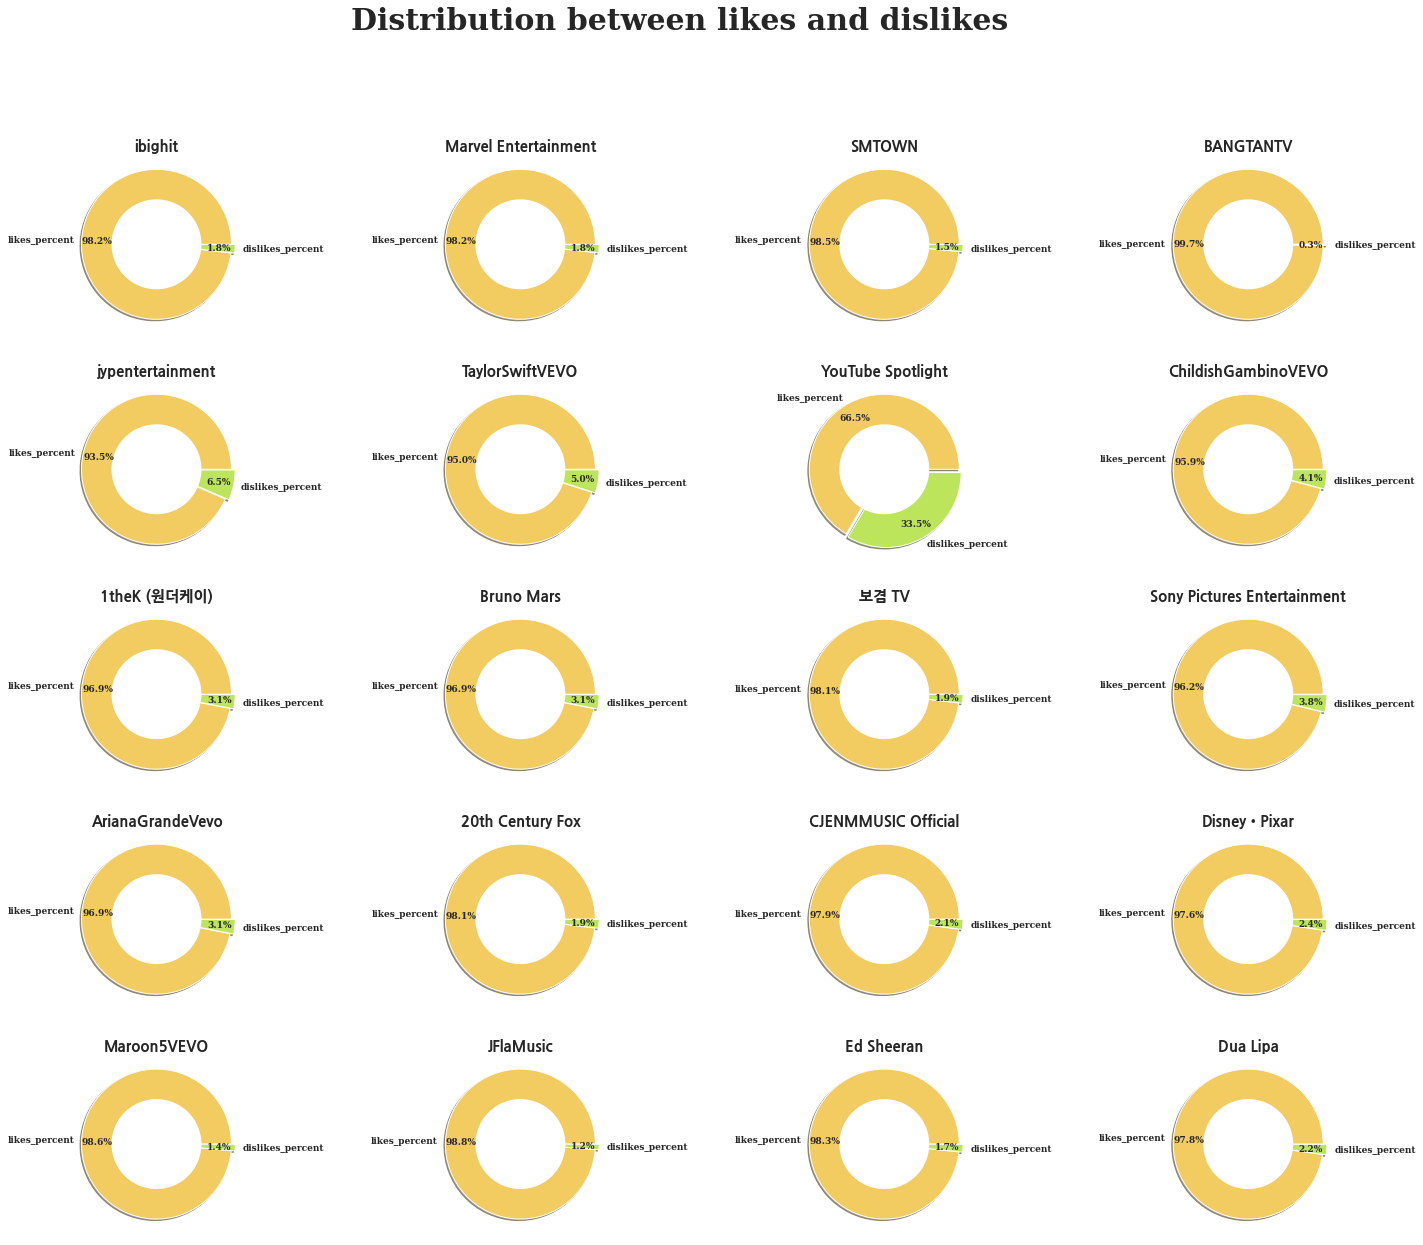

In [ ]:
fig = plt.subplots(figsize=(25,20))
gs = GridSpec(nrows=5, ncols=4, width_ratios=[10,10,10,10], height_ratios=[10,10,10,10,10])
for i,j in enumerate(data_ld_top20.T.drop(['likes', 'dislikes']).columns):
  ax=plt.subplot(gs[i])
  ax.pie(data_ld_top20.T.drop(['likes', 'dislikes'])[j], labels=data_ld_top20.T.drop(['likes', 'dislikes'])[j].index, autopct='%1.1f%%', pctdistance=.79, colors=['#F2CB61', '#BCE55C']
         ,shadow=True, explode=[0, 0.05], textprops={'fontweight':'bold', 'fontsize':9, 'fontfamily':'serif'})
  ax.set_title(f'{j}', fontsize=15, fontweight='bold', pad=0)
  centre_circle = plt.Circle((0,0), 0.60, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Distribution between likes and dislikes', fontsize=30, fontweight='bold', fontfamily='serif')

[]

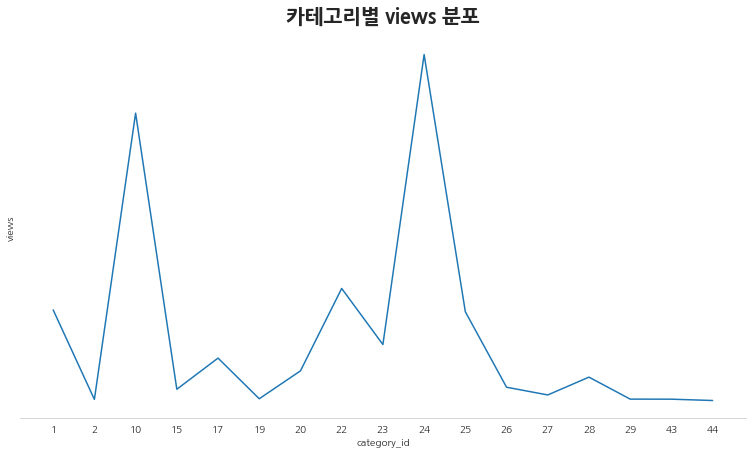

In [252]:
data_cv = data.groupby('category_id')['views'].sum()
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.lineplot(x=data_cv.index.astype('str'), y=data_cv.astype(int))
ax.set_title('카테고리별 views 분포', fontsize=20, fontweight='bold', pad=15)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])

Text(0.5, 1.0, '카테고리별 likes, dislikes 분표')

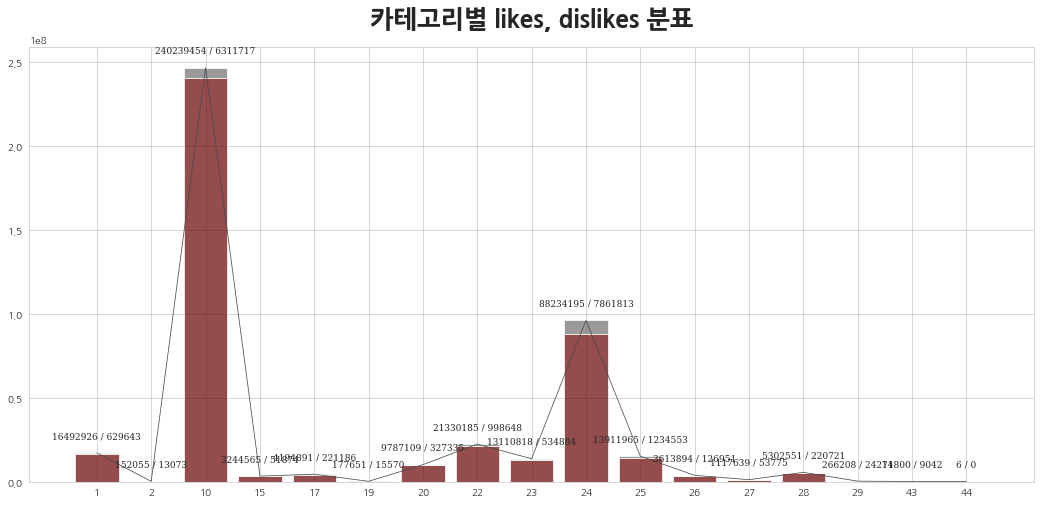

In [335]:
data_cld = data.groupby('category_id')['likes','dislikes'].sum()
data_cld.index=data_cld.index.astype('str')
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(data_cld.index.astype('str'), data_cld['likes'], color='#670000', alpha=.7)
ax.bar(data_cld.index.astype('str'), data_cld['dislikes'], bottom=data_cld['likes'], color='#6F6F6F', alpha=.7)
ax.plot(data_cld.index.astype('str'), data_cld['likes']+data_cld['dislikes']+100000, color='#4a4a4a', linewidth=.75)
for i in data_cld.index:
  ax.annotate(f"{data_cld['likes'].loc[i]} / {data_cld['dislikes'].loc[i]}", xy=(i, data_cld['likes'].loc[i] + data_cld['dislikes'].loc[i] + 10000000), va='center', ha='center', fontfamily='serif', fontsize=9)

ax.set_title('카테고리별 likes, dislikes 분표', fontsize=25, fontweight='bold', pad=20)

Text(0.5, 0, 'Year')

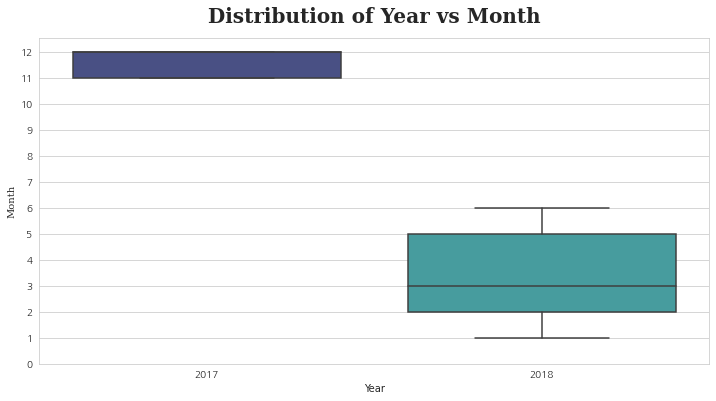

In [357]:
data_ymd = data.loc[:,'Year':'day']
plt.figure(figsize=(12,6))
sns.boxplot(x=data_ymd['Year'], y=data_ymd['Month'], palette=sns.color_palette('mako', n_colors=2))
plt.yticks(range(0,13,1))
plt.title('Distribution of Year vs Month', fontsize=20, fontfamily='serif', fontweight='bold', pad=15)
plt.ylabel('Month', fontfamily='serif')
plt.xlabel('Year', fontfamily='seif')

In [ ]:
data

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Month,day
0,RxGQe4EeEpA,2017-11-14,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,2017,11,14
1,hH7wVE8OlQ0,2017-11-14,JSA 귀순 북한군 총격 부상,Edward,25,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,2017,11,14
2,9V8bnWUmE9U,2017-11-14,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,False,False,False,퍼가실때 꼭 출처 부탁드려요,2017,11,14
3,0_8py-t5R80,2017-11-14,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,False,False,False,다스는 누구겁니까 듣고 난 후 표정,2017,11,14
4,bk55RbxiQdI,2017-11-14,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,2017,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,2018-06-14,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,[none],156439,383,58,308,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...,2018,6,14
34563,_Ne9ER-jr20,2018-06-14,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,[none],130948,3121,55,988,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ...",2018,6,14
34564,xuOQq_fzEjk,2018-06-14,2018년 6월 13일 아침 뉴스,News Express,25,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...,2018,6,14
34565,uXvjxeg08eQ,2018-06-14,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...,2018,6,14
